## **Initialization**

In [10]:
from networkx import LFR_benchmark_graph
from modules.miscellaneous import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

#Here we set the style of the plots
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=11)
plt.rc('figure', titlesize=12)
plt.rc('font', family='serif')
plt.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['text.usetex'] = True

## **Random Network Model**

In [9]:
#We can generate several graphs with the LFR benchmark
n = 400
lfr1 = LFRBenchmark(n, homophily=0.80, modularity=0.05, init_opinions=True)
lfr2 = LFRBenchmark(n, homophily=0.20, modularity=0.05, init_opinions=True)
lfr3 = LFRBenchmark(n, homophily=0.80, modularity=0.95, init_opinions=True)
lfr4 = LFRBenchmark(n, homophily=0.20, modularity=0.95, init_opinions=True)

#Here we define an example of a network with a power-law degree distribution
DEFAULT_POWER_LAW_COEF = 2.75
DEFAULT_MAX_ITERS = 50
DEFAULT_AVG_DEG = 12
DEFAULT_TAU2 = 1.1
N=100000
G = LFR_benchmark_graph(N, tau1=DEFAULT_POWER_LAW_COEF, tau2=DEFAULT_TAU2, mu=0.1, average_degree=DEFAULT_AVG_DEG, min_community=n//20, seed=2)

In [3]:
#Here we obtain the degree distribution of the network
degrees, x, y = degree_dist(G)
#Then we fit a power-law distribution to the data
fit, alpha = fit_power_law(degrees)

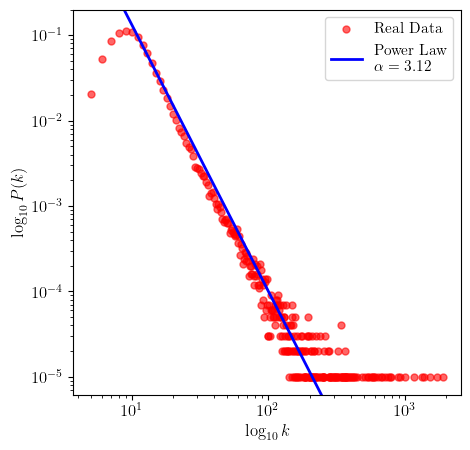

In [4]:
fig, ax= plt.subplots(1, 1, figsize=(5, 5))
#Here we plot the real data
ax.plot(x, y, color='red', marker='o', linestyle='', label='Real Data', alpha=0.6, markersize=5)
fit.power_law.plot_pdf(color='b', linestyle='-', linewidth=2, label=f'Power Law\n$\\alpha = {alpha:.2f}$', ax=ax)
#Here we set limits for the y-axis
ax.set_ylim(11**-5, 0.2)
#Here we set the labels
ax.set_xlabel(r'$\log_{10} k$')
ax.set_ylabel(r'$\log_{10} P(k)$')
#Here we take the grid off
ax.grid(False)
#Here we set the legend
ax.legend()
#Here we save the figure
#plt.savefig('plots/power_law_example.png', dpi = 300, bbox_inches='tight')

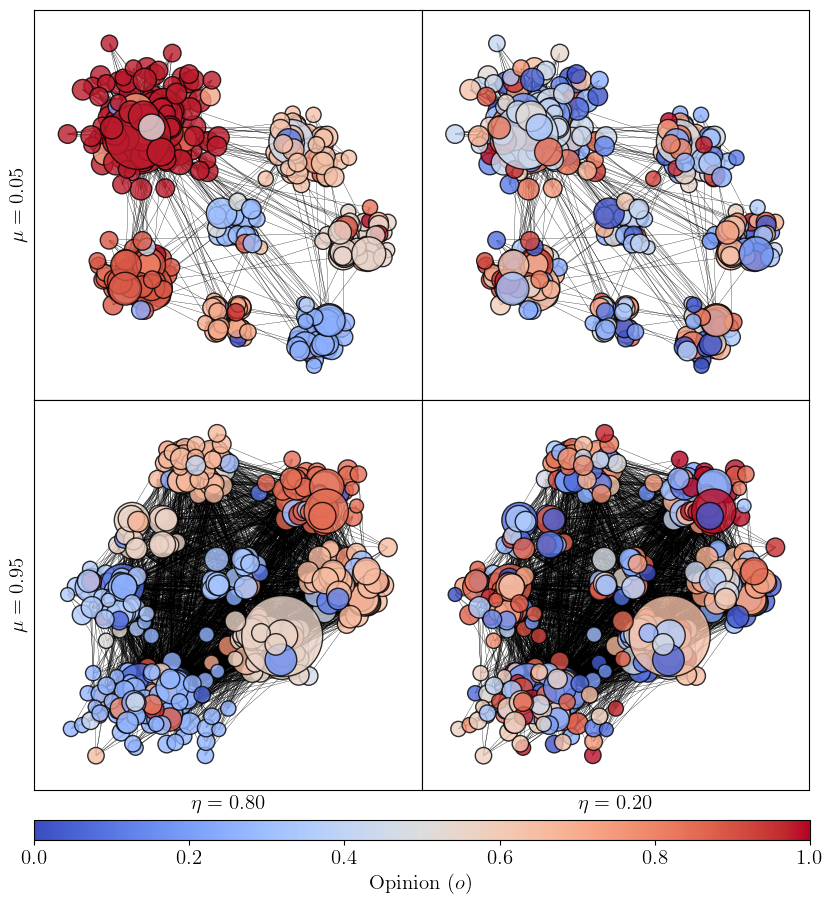

In [60]:
#Here we plot the graph and color by opinion, size proportional to degree, fruchterman_reingold layout
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
lfr1.plot_graph(ax=axs[0, 0])
lfr2.plot_graph(ax=axs[0, 1])
lfr3.plot_graph(ax=axs[1, 0])
lfr4.plot_graph(ax=axs[1, 1])
#Here we add a colorbar at the bottom for all the plots that spans the width of the figure
fig.subplots_adjust(bottom=0.1,
                    wspace=0,
                    hspace=0)
cbar_ax = fig.add_axes([0.125, 0.05, 0.776, 0.02])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=1),cmap="coolwarm"),cax=cbar_ax,orientation="horizontal")
cb.set_label("Opinion $(o)$", size=15)
cb.ax.tick_params(labelsize=15)
axs[0,0].set_ylabel("$\mu = 0.05$", size=15)
axs[1,0].set_ylabel("$\mu = 0.95$", size=15)
axs[1,0].set_xlabel("$\eta = 0.80$", size=15)
axs[1,1].set_xlabel("$\eta = 0.20$", size=15)
#plt.savefig("plots/lfr_benchmark.png", dpi = 300, bbox_inches='tight')

## **The Effect of Friend Recommendation Algorithms**

In [9]:
graphs, clustering, gini, rwc, nci = run_example_simulations(homophily=0.8, modularity=0.25)
n_maxmin_alpha, e_maxmin_alpha = get_maxmin_alphas(graphs)

100%|██████████| 5/5 [1:48:41<00:00, 1304.39s/it]


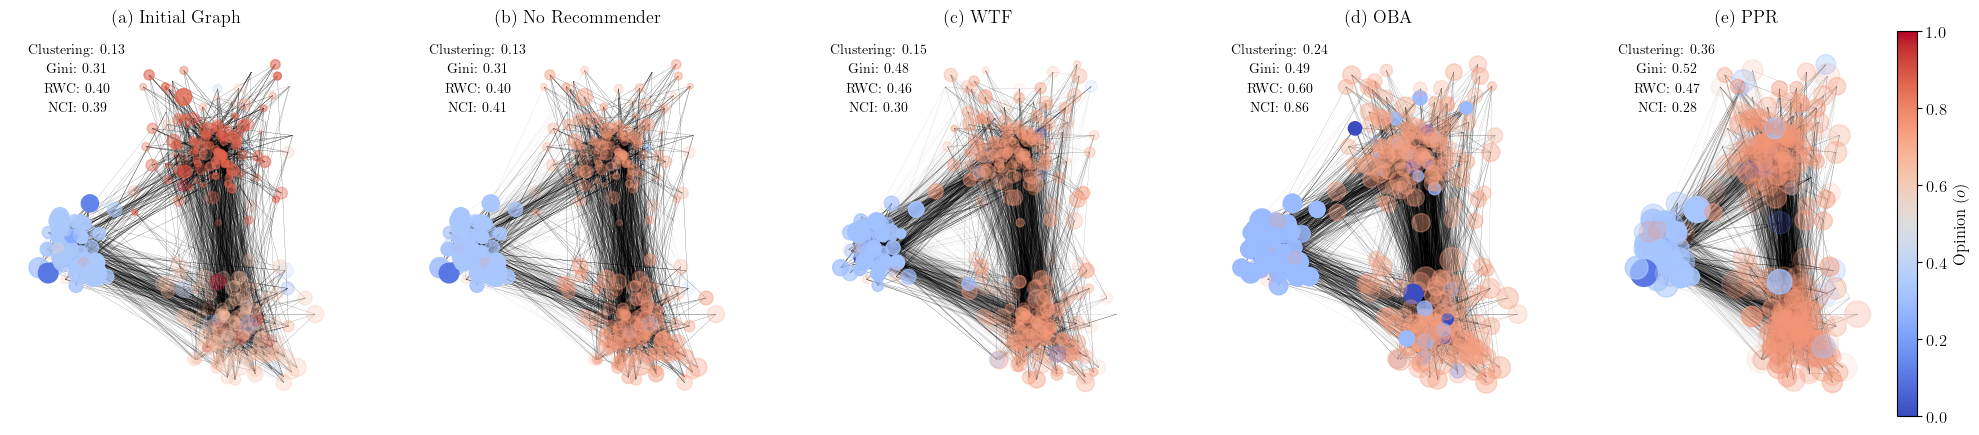

In [14]:
#Now we make a 5x1 plot with the graphs
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    plot_graph(graphs[i], n_maxmin_alpha, e_maxmin_alpha, ax=axs[i])
    #Here we add text to the plot with the Clustering, Gini, RWC and NCI values to two decimal places
    axs[i].text(0.2, 0.95, "Clustering: {:.2f}".format(clustering[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.90, "Gini: {:.2f}".format(gini[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.85, "RWC: {:.2f}".format(rwc[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.80, "NCI: {:.2f}".format(nci[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    #Here we take out the box of the plot
    axs[i].axis('off')

#Here we add titles
axs[0].set_title("(a) Initial Graph", size=13)
axs[1].set_title("(b) No Recommender", size=13)
axs[2].set_title("(c) WTF", size=13)
axs[3].set_title("(d) OBA", size=13)
axs[4].set_title("(e) PPR", size=13)

#Here we add a colorbar at the last plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm= matplotlib.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(sm, ax=axs[4], orientation='vertical', label="Opinion $(o)$")
#Here we save the plot
#plt.savefig("simulation_high_mod.png", dpi = 300, bbox_inches='tight')

In [11]:
graphs_, clustering_, gini_, rwc_, nci_ = run_example_simulations(homophily=0.8, modularity=0.95)
n_maxmin_alpha_, e_maxmin_alpha_ = get_maxmin_alphas(graphs_)

100%|██████████| 5/5 [1:40:43<00:00, 1208.71s/it]


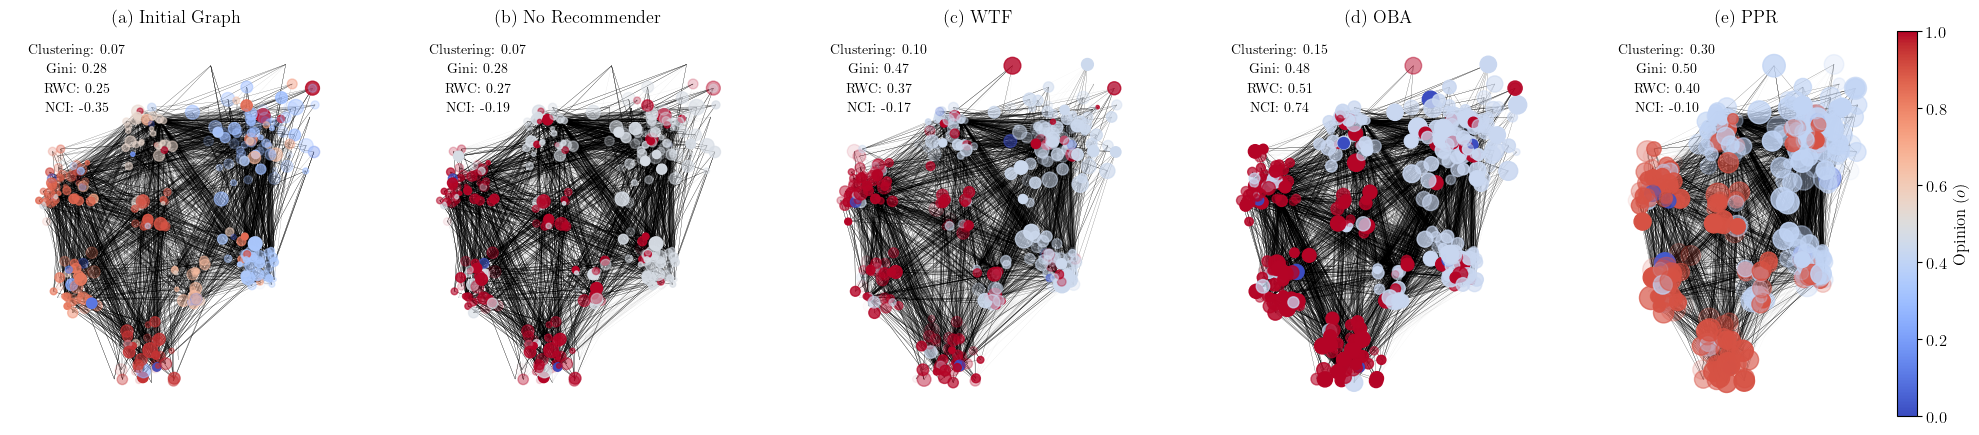

In [16]:
#Now we make a 5x1 plot with the graphs
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    plot_graph(graphs_[i], n_maxmin_alpha_, e_maxmin_alpha_, ax=axs[i])
    #Here we add text to the plot with the Clustering, Gini, RWC and NCI values to two decimal places
    axs[i].text(0.2, 0.95, "Clustering: {:.2f}".format(clustering_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.90, "Gini: {:.2f}".format(gini_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.85, "RWC: {:.2f}".format(rwc_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    axs[i].text(0.2, 0.80, "NCI: {:.2f}".format(nci_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
    #Here we take out the box of the plot
    axs[i].axis('off')

#Here we add titles
axs[0].set_title("(a) Initial Graph", size=13)
axs[1].set_title("(b) No Recommender", size=13)
axs[2].set_title("(c) WTF", size=13)
axs[3].set_title("(d) OBA", size=13)
axs[4].set_title("(e) PPR", size=13)

#Here we add a colorbar at the last plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm= matplotlib.colors.Normalize(vmin=0, vmax=1))
fig.colorbar(sm, ax=axs[4], orientation='vertical', label="Opinion $(o)$")
#Here we save the plot
#plt.savefig("pdfs/simulation_low_mod.pdf", dpi = 300, bbox_inches='tight')

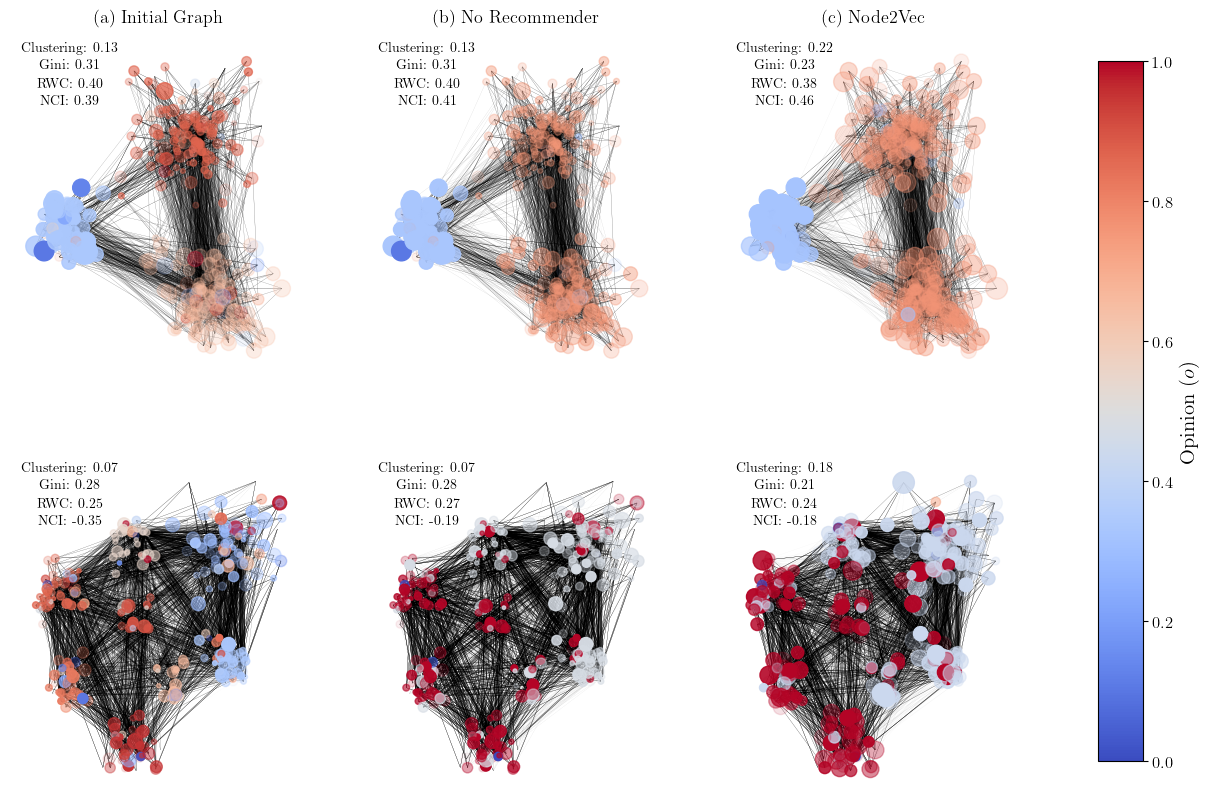

In [43]:
#Now we make a 3x1 plot with the graphs
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
index_list = [0, 1, -1]
for i in index_list:
    plot_graph(graphs[i], n_maxmin_alpha, e_maxmin_alpha, ax=axs[0,i])
    plot_graph(graphs_[i], n_maxmin_alpha_, e_maxmin_alpha_, ax=axs[1,i])
    #Here we add text to the plot with the Clustering, Gini, RWC and NCI values to two decimal places
    axs[0,i].text(0.2, 0.95, "Clustering: {:.2f}".format(clustering[i]), horizontalalignment='center', verticalalignment='center', transform=axs[0,i].transAxes)
    axs[1,i].text(0.2, 0.95, "Clustering: {:.2f}".format(clustering_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[1,i].transAxes)
    axs[0,i].text(0.2, 0.90, "Gini: {:.2f}".format(gini[i]), horizontalalignment='center', verticalalignment='center', transform=axs[0,i].transAxes)
    axs[1,i].text(0.2, 0.90, "Gini: {:.2f}".format(gini_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[1,i].transAxes)
    axs[0,i].text(0.2, 0.85, "RWC: {:.2f}".format(rwc[i]), horizontalalignment='center', verticalalignment='center', transform=axs[0,i].transAxes)
    axs[1,i].text(0.2, 0.85, "RWC: {:.2f}".format(rwc_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[1,i].transAxes)
    axs[0,i].text(0.2, 0.80, "NCI: {:.2f}".format(nci[i]), horizontalalignment='center', verticalalignment='center', transform=axs[0,i].transAxes)
    axs[1,i].text(0.2, 0.80, "NCI: {:.2f}".format(nci_[i]), horizontalalignment='center', verticalalignment='center', transform=axs[1,i].transAxes)
    #Here we take out the box of the plot
    axs[0,i].axis('off')
    axs[1,i].axis('off')

#Here we add titles

axs[0,0].set_title("(a) Initial Graph", size=13)
axs[0,1].set_title("(b) No Recommender", size=13)
axs[0,-1].set_title("(c) Node2Vec", size=13)

#Here we add a colorbar at the last plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm= matplotlib.colors.Normalize(vmin=0, vmax=1))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(sm,cax=cbar_ax)
cb.set_label("Opinion $(o)$", size=15)
#Here we save the plot
#plt.savefig("pdfs/simulation_node2vec.pdf", dpi = 300, bbox_inches='tight')

## **PROD Methodology Results**

In [20]:
results_random_clus, results_pagerank_clus, results_wtf_clus, results_oba_clus = get_results_matrix("clustering")

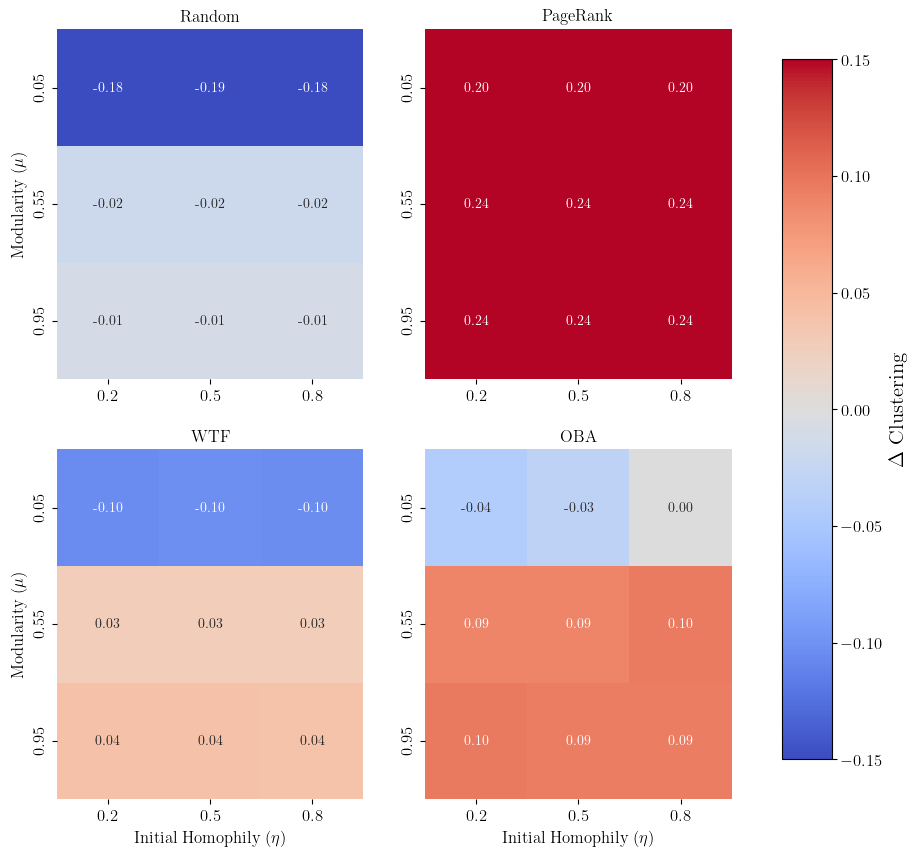

In [26]:
#Here we plot the results of clustering for all 4 recommender systems together
#We plot the heatmap with the values of the delta clustering in each case rounded to 2 decimal places
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(results_random_clus, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_random_clus))
sns.heatmap(results_pagerank_clus, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_pagerank_clus))
sns.heatmap(results_wtf_clus, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[1, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_wtf_clus))
sns.heatmap(results_oba_clus, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[1, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_oba_clus))
for ax in axs.flat:
    ax.set_xticklabels([0.2, 0.5, 0.8])
    ax.set_yticklabels([0.05, 0.55, 0.95])
#Here we set the labels for each plot
axs[0,0].set_title("Random")
axs[0,1].set_title("PageRank")
axs[1,0].set_title("WTF")
axs[1,1].set_title("OBA")
#Here we set the labels for the x and y axis
axs[0,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_xlabel("Initial Homophily ($\eta$)")
axs[1,1].set_xlabel("Initial Homophily ($\eta$)")

#Here we add a colorbar to the right of the plots with a title above it
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.15, vmax=0.15),cmap="coolwarm"),cax=cbar_ax)
cb.set_label("$\Delta$ Clustering", size=15)

#Here we save the plot
#plt.savefig("pdfs/clustering_results.pdf", dpi = 300, bbox_inches='tight')


In [27]:
results_random_gini, results_pagerank_gini, results_wtf_gini, results_oba_gini = get_results_matrix("gini")

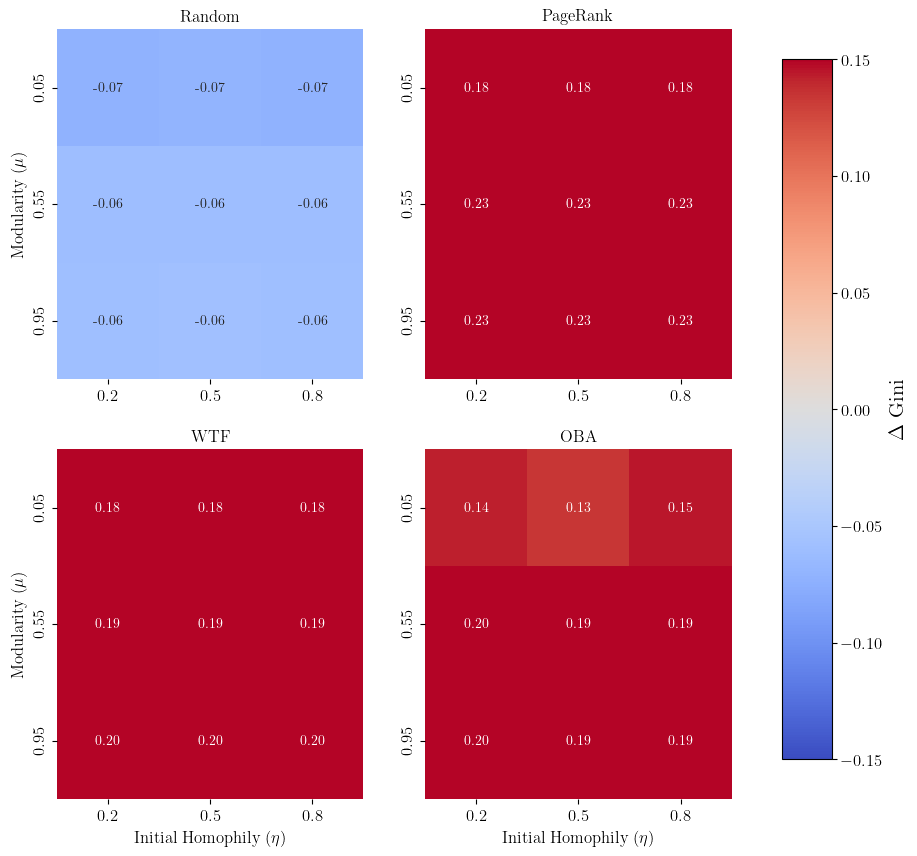

In [31]:
#Here we plot the results of RWC for all 4 recommender systems together
#We plot the heatmap with the values of the delta RWC in each case rounded to 2 decimal places
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(results_random_gini, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_random_gini))
sns.heatmap(results_pagerank_gini, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_pagerank_gini))
sns.heatmap(results_wtf_gini, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[1, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_wtf_gini))
sns.heatmap(results_oba_gini, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[1, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_oba_gini))
for ax in axs.flat:
    ax.set_xticklabels([0.2, 0.5, 0.8])
    ax.set_yticklabels([0.05, 0.55, 0.95])
#Here we set the labels for each plot
axs[0,0].set_title("Random")
axs[0,1].set_title("PageRank")
axs[1,0].set_title("WTF")
axs[1,1].set_title("OBA")
#Here we set the labels for the x and y axis
axs[0,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_xlabel("Initial Homophily ($\eta$)")
axs[1,1].set_xlabel("Initial Homophily ($\eta$)")

#Here we add a colorbar to the right of the plots with a title above it
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.15, vmax=0.15),cmap="coolwarm"),cax=cbar_ax)
cb.set_label("$\Delta$ Gini", size=15)

#Here we save the plot
#plt.savefig("plots/gini_results.png", dpi = 300, bbox_inches='tight')


In [33]:
results_random_nci, results_pagerank_nci, results_wtf_nci, results_oba_nci = get_results_matrix("nci")

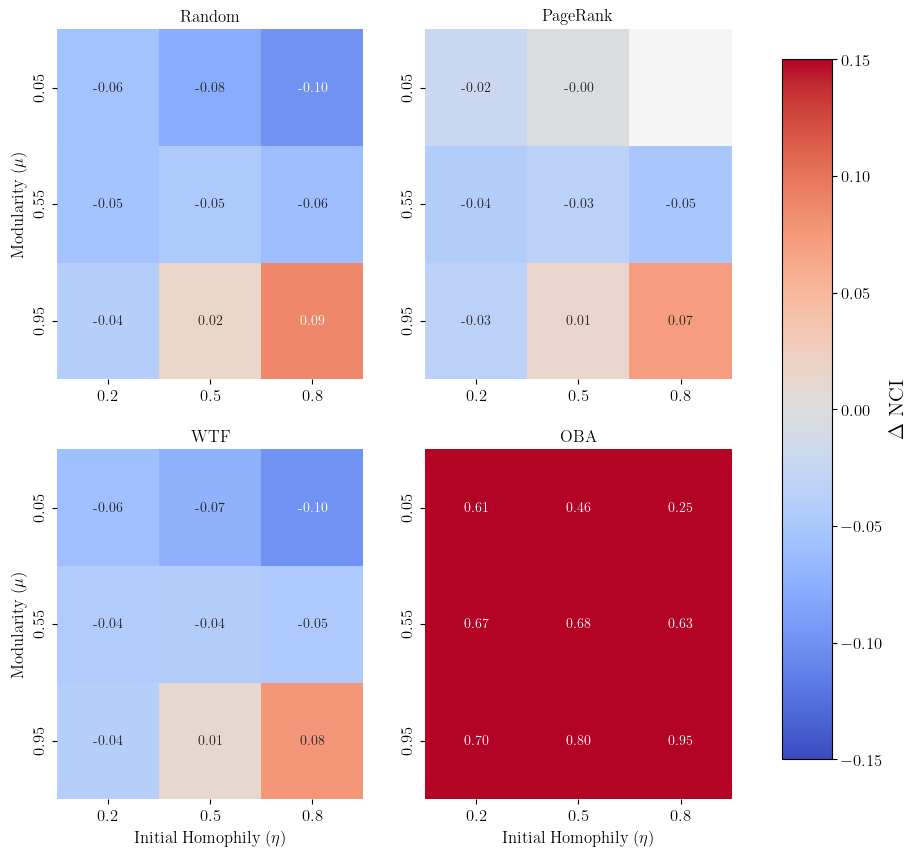

In [43]:
#Here we plot the results of NCI for all 4 recommender systems together
#We plot the heatmap with the values of the delta NCI in each case rounded to 2 decimal places
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#Here we assign a default color to the mask
cmap = matplotlib.colormaps.get_cmap("coolwarm")
cmap.set_bad(color="whitesmoke")
sns.heatmap(results_random_nci, annot=True, fmt=".2f", cmap=cmap, ax=axs[0, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_random_nci))
sns.heatmap(results_pagerank_nci, annot=True, fmt=".2f", cmap=cmap, ax=axs[0, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_pagerank_nci))
sns.heatmap(results_wtf_nci, annot=True, fmt=".2f", cmap=cmap, ax=axs[1, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_wtf_nci))
sns.heatmap(results_oba_nci, annot=True, fmt=".2f", cmap=cmap, ax=axs[1, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_oba_nci))
for ax in axs.flat:
    ax.set_xticklabels([0.2, 0.5, 0.8])
    ax.set_yticklabels([0.05, 0.55, 0.95])
#Here we set the labels for each plot
axs[0,0].set_title("Random")
axs[0,1].set_title("PageRank")
axs[1,0].set_title("WTF")
axs[1,1].set_title("OBA")
#Here we set the labels for the x and y axis
axs[0,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_xlabel("Initial Homophily ($\eta$)")
axs[1,1].set_xlabel("Initial Homophily ($\eta$)")

#Here we add a colorbar to the right of the plots with a title above it
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.15, vmax=0.15),cmap="coolwarm"),cax=cbar_ax)
cb.set_label("$\Delta$ NCI", size=15)

#Here we save the plot
#plt.savefig("pdfs/nci_results.pdf", dpi = 300, bbox_inches='tight')


In [44]:
results_random_rwc, results_pagerank_rwc, results_wtf_rwc, results_oba_rwc = get_results_matrix("rwc")

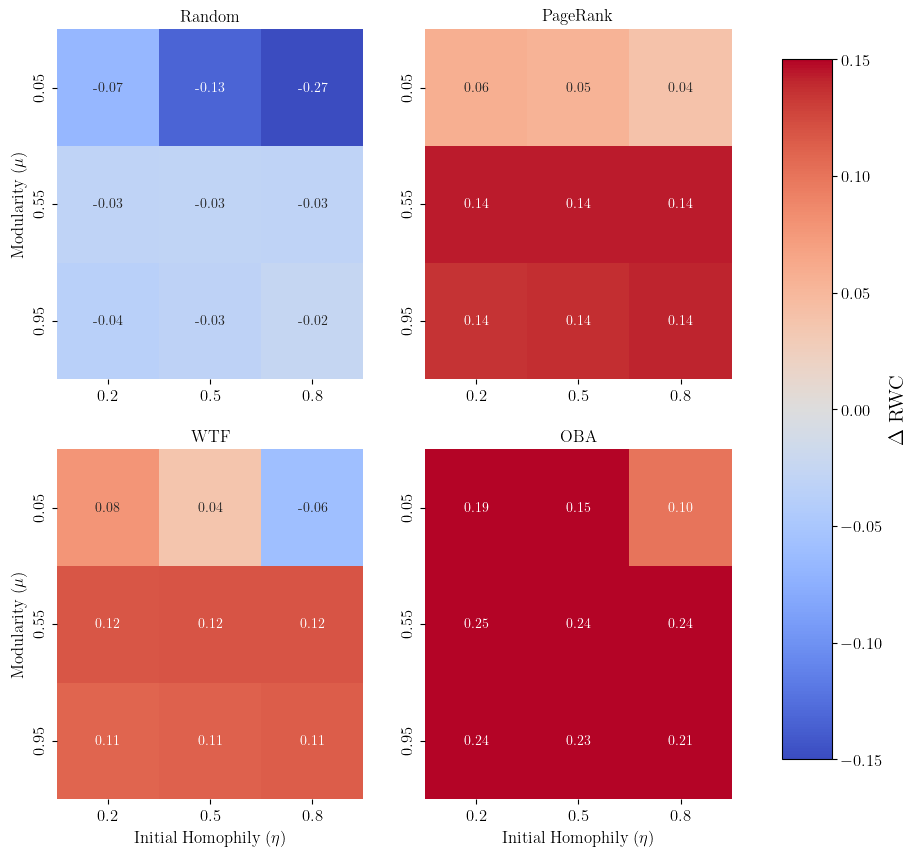

In [47]:
#Here we plot the results of RWC for all 4 recommender systems together
#We plot the heatmap with the values of the delta RWC in each case rounded to 2 decimal places
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#Here we assign a default color to the mask
cmap = matplotlib.colormaps.get_cmap("coolwarm")
cmap.set_bad(color="whitesmoke")
sns.heatmap(results_random_rwc, annot=True, fmt=".2f", cmap=cmap, ax=axs[0, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_random_rwc))
sns.heatmap(results_pagerank_rwc, annot=True, fmt=".2f", cmap=cmap, ax=axs[0, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_pagerank_rwc))
sns.heatmap(results_wtf_rwc, annot=True, fmt=".2f", cmap=cmap, ax=axs[1, 0], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_wtf_rwc))
sns.heatmap(results_oba_rwc, annot=True, fmt=".2f", cmap=cmap, ax=axs[1, 1], cbar=False, vmin=-0.15, vmax=0.15, mask=np.isnan(results_oba_rwc))
for ax in axs.flat:
    ax.set_xticklabels([0.2, 0.5, 0.8])
    ax.set_yticklabels([0.05, 0.55, 0.95])
#Here we set the labels for each plot
axs[0,0].set_title("Random")
axs[0,1].set_title("PageRank")
axs[1,0].set_title("WTF")
axs[1,1].set_title("OBA")
#Here we set the labels for the x and y axis
axs[0,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_ylabel("Modularity ($\mu$)")
axs[1,0].set_xlabel("Initial Homophily ($\eta$)")
axs[1,1].set_xlabel("Initial Homophily ($\eta$)")

#Here we add a colorbar to the right of the plots with a title above it
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-0.15, vmax=0.15),cmap="coolwarm"),cax=cbar_ax)
cb.set_label("$\Delta$ RWC", size=15)

#Here we save the plot
#plt.savefig("plots/rwc_results.png", dpi = 300, bbox_inches='tight')


## **Intervention Results**

In [2]:
results_clustering_pagerank_intervention_random, results_clustering_pagerank_intervention_opinion = get_intervention_results("clustering")
results_gini_pagerank_intervention_random, results_gini_pagerank_intervention_opinion = get_intervention_results("gini")
results_nci_pagerank_intervention_random, results_nci_pagerank_intervention_opinion = get_intervention_results("nci")
results_rwc_pagerank_intervention_random, results_rwc_pagerank_intervention_opinion = get_intervention_results("rwc")

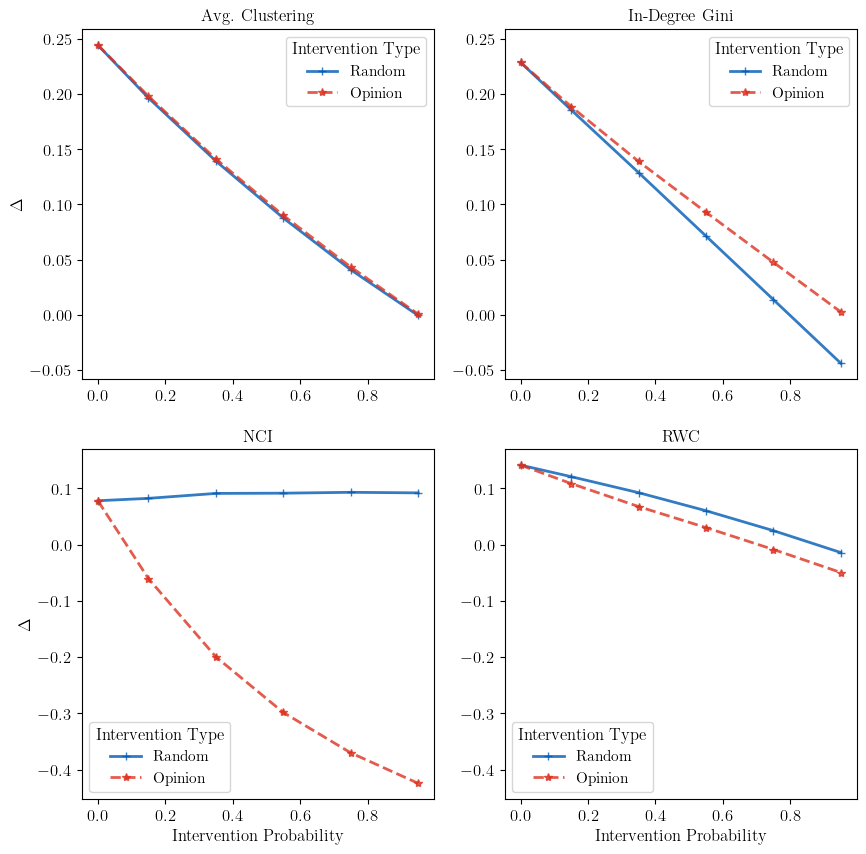

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey="row")
intervention_probabilities = [0, 0.15, 0.35, 0.55, 0.75, 0.95]
axs[0, 0].plot(intervention_probabilities, results_clustering_pagerank_intervention_random, label="Random", marker="+", color="#005AB5", linewidth=2, alpha=0.8)
axs[0, 0].plot(intervention_probabilities, results_clustering_pagerank_intervention_opinion, label="Opinion", marker="*", color="#DC3220", linewidth=2, linestyle="--" , alpha=0.8)
#axs[0, 0].set_xlabel("Intervention Probability")
axs[0, 0].set_ylabel("$\Delta$")
axs[0, 0].legend(title="Intervention Type")
axs[0,0].set_title("Avg. Clustering")

axs[0, 1].plot(intervention_probabilities, results_gini_pagerank_intervention_random, label="Random", marker="+", color="#005AB5", linewidth=2, alpha=0.8)
axs[0, 1].plot(intervention_probabilities, results_gini_pagerank_intervention_opinion, label="Opinion", marker="*", color="#DC3220", linewidth=2, linestyle="--" , alpha=0.8)
#axs[0, 1].set_xlabel("Intervention Probability")
axs[0,1].yaxis.set_tick_params(labelleft=True)
#axs[0, 1].set_ylabel("$\Delta$ Gini")
axs[0, 1].legend(title="Intervention Type")
axs[0,1].set_title("In-Degree Gini")

axs[1, 0].plot(intervention_probabilities, results_nci_pagerank_intervention_random, label="Random", marker="+", color="#005AB5", linewidth=2, alpha=0.8)
axs[1, 0].plot(intervention_probabilities, results_nci_pagerank_intervention_opinion, label="Opinion", marker="*", color="#DC3220", linewidth=2, linestyle="--", alpha=0.8)
axs[1, 0].set_xlabel("Intervention Probability")
axs[1, 0].set_ylabel("$\Delta$")
axs[1, 0].legend(title="Intervention Type")
axs[1,0].set_title("NCI")

axs[1, 1].plot(intervention_probabilities, results_rwc_pagerank_intervention_random, label="Random", marker="+", color="#005AB5", linewidth=2, alpha=0.8)
axs[1, 1].plot(intervention_probabilities, results_rwc_pagerank_intervention_opinion, label="Opinion", marker="*", color="#DC3220", linewidth=2, linestyle="--", alpha=0.8)
axs[1, 1].set_xlabel("Intervention Probability")
axs[1,1].yaxis.set_tick_params(labelleft=True)
#axs[1, 1].set_ylabel("$\Delta$ RWC")
#Here we put the legend box at the left bottom corner and as title "Type of Intervention"
axs[1, 1].legend(loc="lower left", title="Intervention Type")
axs[1,1].set_title("RWC")

#Here we save the plot
#plt.savefig("pdfs/intervention_results.pdf", dpi = 300, bbox_inches='tight')